In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading Data**

In [ ]:
data = pd.read_excel('/content/data_guide.xlsx', sheet_name='Data')
data.head()

,id,translated_text
0,1,Keep up the good work
1,2,I don't have access to some applications and I...
2,3,Thank you very much for refreshing your PC. Ho...
3,4,"When an event other than normal, such as an er..."
4,5,"As a meaning of IT services, the evaluation of..."


In [ ]:
data.shape

(2921, 2)

In [ ]:
data.isnull().sum()

id                 0
translated_text    0
dtype: int64

In [ ]:
data.nunique()

id                 2921
translated_text    2913
dtype: int64

In [ ]:
duplicate = data[data.translated_text.duplicated()] 
duplicate

,id,translated_text
458,459,None in particular
700,701,none at this time
769,770,none at this time
1257,1258,Thank you very much.
1995,1996,Keep up the good work!
2231,2232,Nothing in particular.
2281,2282,Nothing at this time.
2383,2384,None in particular


**WordCloud**

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

def display_wordCloud(train, title = None):
    wordcloud = WordCloud(background_color = 'black',
                         stopwords = stopwords,
                         max_words = 200,
                         max_font_size = 40,
                         scale = 3,
                         random_state = 1).generate(str(train))
    fig = plt.figure(1,figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

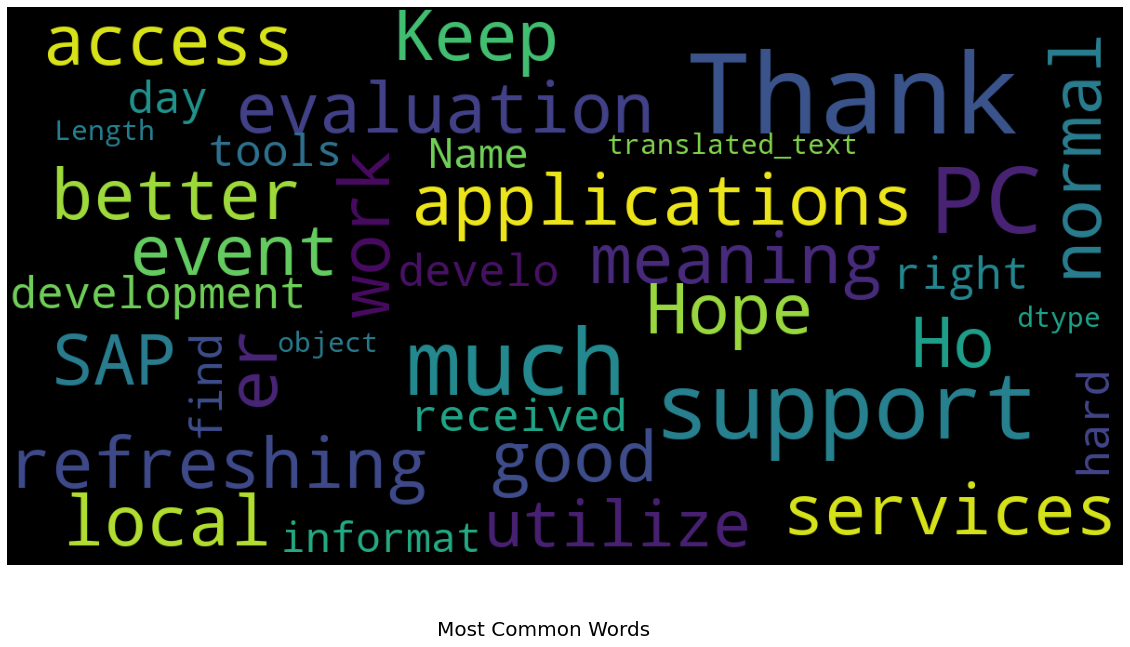

In [ ]:
display_wordCloud(data['translated_text'],'Most Common Words ')

**Basic Pre-Processing**

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

In [12]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'm' ,'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'hi', 'hello','he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [13]:
from nltk.stem import  SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer

def stem_text(text):
    tokenizer = ToktokTokenizer()
    stemmer = SnowballStemmer('english')
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


In [14]:
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Cleaning Texts of Train Dataset

# Combining all the above stundents 
from tqdm import tqdm
text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['translated_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = replace_contractions(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = lemma_text(sentance)
    sentance = stem_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    text.append(sentance.strip())

  0%|          | 0/2921 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


100%|██████████| 2921/2921 [00:04<00:00, 664.79it/s]


In [ ]:
data['clean_text'] = text
data.head()

,id,translated_text,clean_text
0,1,Keep up the good work,keep good work
1,2,I don't have access to some applications and I...,not access applic also onli trial veri simpli ...
2,3,Thank you very much for refreshing your PC. Ho...,thank veri much refresh pc howev think good ma...
3,4,"When an event other than normal, such as an er...",event normal error occur resolv pleas make ann...
4,5,"As a meaning of IT services, the evaluation of...",mean servic evalu abov answer chang depend whe...


**Generating Topics**

In [ ]:
!pip install pyLDAvis

import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)



     |████████████████████████████████| 1.6MB 15.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=cc2750ed91ad4c7d8edae6b308441a2508c2118d3557ad5b4388849bd9096640
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_data = data['clean_text'].map(preprocess)
processed_data[:10]

0                                         [good, work]
1    [access, applic, on, trial, veri, simpli, vers...
2    [thank, veri, refresh, howev, think, good, man...
3    [event, normal, error, occur, resolv, plea, an...
4    [mean, servic, evalu, abov, answer, chang, dep...
5    [miss, access, servic, request, role, everi, s...
6    [outsourc, work, cost, effect, wast, time, pro...
7    [mani, spetial, servic, need, local, admin, ri...
8    [self, help, exten, chat, servic, poor, alway,...
9                 [realli, like, servic, fast, effect]
Name: clean_text, dtype: object

In [ ]:
processed_data_list = list(processed_data)

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal:
#spacy.load('en')
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(processed_data_list, allowed_postags=['NOUN', 'VERB']) 
#select noun and verb
print(data_lemmatized[:5])

['work', 'trial veri version program need fulli', 'thank think search', 'event error occur situat user user', 'desk support offic wifi disconnect virus think lock wonder tool atend atend display case forefront tool requir']


**Building Topic Model**

In [ ]:
#   Create the Document-Word matrix
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,# minimum reqd occurences of a word 
                             stop_words='english',# remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}', # num chars > 3
                             #max_features=50000, # max number of uniq words    
                             )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [ ]:
 # Build LDA model

 lda_model = LatentDirichletAllocation(n_components=20,# Number of topics
                                      max_iter=10,# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,# Random state
                                      batch_size=128,# n docs in each learning iter
                                      evaluate_every = -1,# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -103154.437295406
Perplexity:  288.5951494750746
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


 Grid Search to determine the best LDA model.

In [ ]:
# Define Search Param
search_params = {
                 'n_components': [5,7,10], 
                 'learning_decay': [.5, .3, .1]
                 }

lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

model = GridSearchCV(lda, param_grid=search_params)

model.fit(data_vectorized)
GridSearchCV(cv=None, 
             error_score='raise',
             estimator=LatentDirichletAllocation( batch_size=128,
                                            doc_topic_prior=None,
                                            evaluate_every=-1, 
                                            learning_decay=0.7,
                                            learning_method=None,
                                            learning_offset=10.0,
                                            max_doc_update_iter=100, 
                                            max_iter=10,
                                            mean_change_tol=0.001,
                                            n_components=10, 
                                            n_jobs=1,
                                            #n_topics=None, 
                                            perp_tol=0.1, 
                                            random_state=None,
                                            topic_word_prior=None, 
                                            total_samples=1000000.0, 
                                            verbose=0),
            #fit_params=None,
            iid=True,
            n_jobs=1,
            param_grid= {
                            'n_topics': [5,10,7], 
                            'learning_decay': [0.3,0.1,0.5]
                        },
            pre_dispatch='2*n_jobs', 
            refit=True, 
            return_train_score='warn',
            scoring=None,
            verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method=None,
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total_

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -21682.6118123363
Model Perplexity:  224.35091200710133


Getting Records from Best Model

In [ ]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ['Doc'+ str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic# Styling

def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
 
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
    
    
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.100000,0.590000,0.100000,0.100000,0.100000,1
Doc1,0.040000,0.040000,0.040000,0.420000,0.460000,4
Doc2,0.480000,0.370000,0.050000,0.050000,0.050000,0
Doc3,0.030000,0.030000,0.030000,0.870000,0.030000,3
Doc4,0.720000,0.020000,0.020000,0.020000,0.230000,0
Doc5,0.050000,0.800000,0.050000,0.050000,0.050000,1
Doc6,0.030000,0.880000,0.030000,0.030000,0.030000,1
Doc7,0.470000,0.040000,0.040000,0.040000,0.410000,0
Doc8,0.620000,0.020000,0.020000,0.320000,0.020000,0
Doc9,0.380000,0.420000,0.070000,0.070000,0.070000,1


In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,accept,access,account,action,adapt,addit,address,agent,allow,alway,answer,appear,applic,appreci,approach,area,assist,attempt,audio,automat,avail,avoid,background,barrier,base,becaus,befor,believ,block,break,bring,build,busi,care,case,cell,center,chat,check,click,...,team,tell,term,test,thank,thing,think,ticket,time,today,tool,topic,touch,track,train,transfer,travel,troubl,turn,type,unabl,understand,updat,upgrad,user,veri,version,view,wait,walk,want,wast,week,wifi,window,wonder,work,worker,write,year
Topic0,14.299476,0.203597,14.505439,0.207334,0.202590,7.817399,0.203564,0.206772,12.279660,60.744297,0.204689,0.207640,0.201767,2.255222,3.211584,0.201008,33.524450,0.204028,9.940037,0.202801,0.221097,0.206339,0.200366,0.201993,3.711051,6.769330,0.201742,18.706284,0.201116,0.204870,0.202495,32.593589,0.203743,13.106608,0.268970,0.201525,0.202744,0.223517,0.204927,0.200311,...,0.339936,0.222114,0.205913,0.202227,121.487598,0.203545,74.348687,225.681678,69.958892,1.883695,23.845969,0.203001,0.200579,0.205417,0.201618,0.202719,0.206792,24.480014,0.207194,0.201391,0.200652,0.204574,0.203070,0.200624,0.204082,0.202479,0.201443,0.200974,0.204275,0.203939,0.202972,0.209783,5.617237,19.475874,0.203193,13.323483,130.739246,0.203250,0.205767,0.205018
Topic1,0.205954,62.377588,21.627268,19.228144,0.204618,21.051260,12.275131,0.208054,42.043170,0.558264,34.355882,0.202584,9.987922,0.203298,7.693916,7.319381,0.201947,12.692817,0.203883,9.060968,0.203725,1.017588,0.203603,0.200844,0.203738,7.161069,0.204233,0.206323,0.204313,0.202451,0.201772,0.203410,6.616368,0.203264,19.663905,0.221822,0.363710,0.202803,0.206499,0.208652,...,0.213453,12.503140,18.008686,20.854551,0.203108,118.847577,77.231609,0.253433,343.269249,12.204003,0.257485,13.098099,0.202144,4.925389,0.203478,8.867620,9.780507,0.204567,29.802732,0.201806,0.356500,27.907432,18.773044,15.386447,0.204291,0.215287,0.203419,12.228631,0.320423,14.817983,129.841764,24.107239,14.519924,16.536451,1.459964,0.203447,409.932814,0.203484,0.217646,11.981954
Topic2,0.203822,0.232980,0.209764,10.921113,11.402177,0.202439,0.203260,0.203106,0.204537,8.955381,12.958453,0.201312,0.201883,17.387736,0.205484,0.204103,0.203473,0.203313,0.200923,0.217282,1.897952,0.204471,0.202426,14.671569,0.203596,4.943687,29.263897,0.204772,14.522098,0.205733,29.755244,0.206922,0.203239,0.205749,0.206396,13.237506,0.202774,0.204694,0.202358,1.559785,...,22.487379,39.119023,0.200314,0.203475,0.202175,0.204522,0.238144,0.208964,155.723087,0.202688,0.203942,0.201326,8.752313,0.201996,0.201605,2.231543,0.206662,7.562168,0.205975,0.203668,12.950525,38.866234,0.203507,0.210508,0.631100,0.205704,0.200870,4.562192,36.154859,0.202689,0.204387,0.202894,0.204329,0.204014,0.202750,0.203879,111.503569,19.892115,0.203038,15.463675
Topic3,0.203498,0.210695,0.226059,0.208753,0.203235,0.207113,21.268954,13.339903,0.204158,0.647932,6.665542,18.907160,0.202198,0.202076,0.202440,6.599837,0.201740,0.205405,0.205092,0.201935,25.458706,18.622038,0.210801,0.201008,16.230395,7.367377,0.208439,0.203226,0.203101,15.433097,0.201446,0.203572,9.456941,9.892111,59.811693,0.201301,10.049677,36.724334,0.206848,7.873771,...,361.437255,11.366134,0.204229,0.204340,0.203069,19.960922,0.573310,163.982901,153.980483,0.201887,58.587205,0.204834,0.200519,9.928553,79.274046,6.704327,6.676042,0.204583,0.208795,25.496682,0.205188,0.304271,2.720458,0.200335,154.316530,57.180888,18.399778,0.204604,57.008467,0.200984,0.204733,0.203961,76.933250,0.202913,11.363763,0.203467,62.806240,0.200553,0.203458,0.204416
Topic4,0.202603,145.174543,0.205309,0.206759,0.203780,0.318211,0.205691,0.203853,0.202911,0.202889,0.203093,0.219207,5.334349,0.202569,0.202267,4.496542,0.202615,0.202434,0.200798,7.753920,60.910387,0.319427,14.793691,0.201639,5.970609,0.207751,0.204131,0.202651,0.208640,0.203020,0.201678,0.204058,0.208319,0.201224,24.866500,0.200974,0.669451,0.203107,30.461263,0.202389,...,0.204175,0.203757,0.205745,0.204008,49.526825,0.204859,0.212140,0.206617,88.541313,0.202155

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords



topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
    
    # Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,help,ticket,work,thank,resolv,think,desk,custom,time,alway,follow,someon,perform,dure,need
Topic 1,work,time,laptop,problem,need,want,thing,differ,network,question,come,connect,think,help,screen
Topic 2,person,help,time,work,site,phone,comput,product,home,contact,email,know,mail,internet,sharepoint
Topic 3,team,problem,ticket,user,time,solv,request,contact,train,week,inform,comput,work,process,file
Topic 4,support,need,access,work,time,process,help,understand,tool,program,remot,avail,window,number,start


Assinging topics according to Topic Model

In [ ]:
Topics = ["Connectivity Issues",
          "Device & Hardware",
          "Application & Software",
          "Ticket Issues" , 
          "Support & Services"
         ]

df_topic_keywords["Topics"]=Topics
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topics
Topic 0,help,ticket,work,thank,resolv,think,desk,custom,time,alway,follow,someon,perform,dure,need,Connectivity Issues
Topic 1,work,time,laptop,problem,need,want,thing,differ,network,question,come,connect,think,help,screen,Device & Hardware
Topic 2,person,help,time,work,site,phone,comput,product,home,contact,email,know,mail,internet,sharepoint,Application & Software
Topic 3,team,problem,ticket,user,time,solv,request,contact,train,week,inform,comput,work,process,file,Ticket Issues
Topic 4,support,need,access,work,time,process,help,understand,tool,program,remot,avail,window,number,start,Support & Services


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data['clean_text']))

data_words[:2]

[['keep', 'good', 'work'],
 ['not',
  'access',
  'applic',
  'also',
  'onli',
  'trial',
  'veri',
  'simpli',
  'version',
  'program',
  'need',
  'cannot',
  'fulli',
  'use']]

In [ ]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores),1:].values.tolist()
    #topic = 'pass'

    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
    
# Predict the topic
mytext = ["Thanks , the ticket issue is resolvedfor the internet"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)

print(topic)
print(infer_topic)
print(prob_scores)

['ticket', 'work', 'thank', 'resolv', 'think', 'desk', 'custom', 'time', 'alway', 'follow', 'someon', 'perform', 'dure', 'need', 'Connectivity Issues']
Connectivity Issues
[[0.54947103 0.05000041 0.29993734 0.05034122 0.05024999]]


In [79]:
def apply_predict_topic(text):
 text = [text]
 infer_topic, topic, prob_scores = predict_topic(text = text)
 return(infer_topic)
 
def apply_predict_topic_info(text):
 text = [text]
 infer_topic, topic, prob_scores = predict_topic(text = text)
 return(topic)
 
def apply_predict_prob_scores(text):
 text = [text]
 infer_topic, topic, prob_scores = predict_topic(text = text)
 return prob_scores


data["Topic"]= data['translated_text'].apply(apply_predict_topic)
#data["Topic"]= data['translated_text'].apply(apply_predict_topic_info)
data["Prob_Scores"]= data['translated_text'].apply(apply_predict_prob_scores)



data.head()

,id,translated_text,clean_text,Infer_Topic,Prob_Scores,Topic
0,1,Keep up the good work,keep good work,Device & Hardware,"[[0.10221357691999612, 0.5934862746965897, 0.1...",Device & Hardware
1,2,I don't have access to some applications and I...,not access applic also onli trial veri simpli ...,Support & Services,"[[0.04000049917024261, 0.041052663533996385, 0...",Support & Services
2,3,Thank you very much for refreshing your PC. Ho...,thank veri much refresh pc howev think good ma...,Connectivity Issues,"[[0.4774903278398716, 0.37220611085669647, 0.0...",Connectivity Issues
3,4,"When an event other than normal, such as an er...",event normal error occur resolv pleas make ann...,Ticket Issues,"[[0.03353274115346177, 0.033333483562248585, 0...",Ticket Issues
4,5,"As a meaning of IT services, the evaluation of...",mean servic evalu abov answer chang depend whe...,Connectivity Issues,"[[0.42368607895135396, 0.3160709745751583, 0.0...",Connectivity Issues


In [97]:
data.head()

,id,translated_text,clean_text,Prob_Scores,Topic
0,1,Keep up the good work,keep good work,"[[0.10221357691999612, 0.5934862746965897, 0.1...",Device & Hardware
1,2,I don't have access to some applications and I...,not access applic also onli trial veri simpli ...,"[[0.04000049917024261, 0.041052663533996385, 0...",Support & Services
2,3,Thank you very much for refreshing your PC. Ho...,thank veri much refresh pc howev think good ma...,"[[0.4774903278398716, 0.37220611085669647, 0.0...",Connectivity Issues
3,4,"When an event other than normal, such as an er...",event normal error occur resolv pleas make ann...,"[[0.03353274115346177, 0.033333483562248585, 0...",Ticket Issues
4,5,"As a meaning of IT services, the evaluation of...",mean servic evalu abov answer chang depend whe...,"[[0.42368607895135396, 0.3160709745751583, 0.0...",Connectivity Issues


In [81]:
data.to_csv('Topic_Modelling_output.csv',index = False)

In [101]:
df_base = data.loc[:,['id','translated_text','Topic']]

In [102]:
df = pd.read_csv('/content/Topic_Modelling_output.csv')
df.head()

,id,translated_text,clean_text,Prob_Scores,Topic
0,1,Keep up the good work,keep good work,[[0.10221358 0.59348627 0.10178363 0.10059924 ...,Device & Hardware
1,2,I don't have access to some applications and I...,not access applic also onli trial veri simpli ...,[[0.0400005 0.04105266 0.04000051 0.43904192 ...,Support & Services
2,3,Thank you very much for refreshing your PC. Ho...,thank veri much refresh pc howev think good ma...,[[0.47749033 0.37220611 0.0500007 0.05000145 ...,Connectivity Issues
3,4,"When an event other than normal, such as an er...",event normal error occur resolv pleas make ann...,[[0.03353274 0.03333348 0.03333487 0.86646534 ...,Ticket Issues
4,5,"As a meaning of IT services, the evaluation of...",mean servic evalu abov answer chang depend whe...,[[0.42368608 0.31607097 0.01258825 0.01280965 ...,Connectivity Issues


In [104]:
df['Score_list'] = df['Prob_Scores'].apply(lambda x: re.split('[ ]*', x[2:-2]))

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [108]:
headers = ['Connectivity_Issues_Scores', 'Device_Hardware_Scores', 'Application_Software_Scores', 
           'Ticket_Issues_Scores', 'Support_Services_Scores', 'Useless']

df_scores = pd.DataFrame(data=df['Score_list'].to_list(), columns=headers)
df_scores = df_scores.drop(columns={'Useless'})

In [109]:
output = pd.concat([df_base,df_scores],axis = 1)
output.head()

,id,translated_text,Topic,Connectivity_Issues_Scores,Device_Hardware_Scores,Application_Software_Scores,Ticket_Issues_Scores,Support_Services_Scores
0,1,Keep up the good work,Device & Hardware,0.10221358,0.59348627,0.10178363,0.10059924,0.10191727
1,2,I don't have access to some applications and I...,Support & Services,0.0400005,0.04105266,0.04000051,0.43904192,0.43990441
2,3,Thank you very much for refreshing your PC. Ho...,Connectivity Issues,0.47749033,0.37220611,0.0500007,0.05000145,0.05030142
3,4,"When an event other than normal, such as an er...",Ticket Issues,0.03353274,0.03333348,0.03333487,0.86646534,0.03333356
4,5,"As a meaning of IT services, the evaluation of...",Connectivity Issues,0.42368608,0.31607097,0.01258825,0.01280965,0.23484505


In [111]:
output.to_csv('scalathon_output2.csv',index = False)

In [3]:
data  = pd.read_csv('scalathon_output2.csv')
data.head()

,id,translated_text,Topic,Connectivity_Issues_Scores,Device_Hardware_Scores,Application_Software_Scores,Ticket_Issues_Scores,Support_Services_Scores
0,1,Keep up the good work,Device & Hardware,0.102214,0.593486,0.101784,0.100599,0.101917
1,2,I don't have access to some applications and I...,Support & Services,0.040001,0.041053,0.040001,0.439042,0.439904
2,3,Thank you very much for refreshing your PC. Ho...,Connectivity Issues,0.477490,0.372206,0.050001,0.050001,0.050301
3,4,"When an event other than normal, such as an er...",Ticket Issues,0.033533,0.033333,0.033335,0.866465,0.033334
4,5,"As a meaning of IT services, the evaluation of...",Connectivity Issues,0.423686,0.316071,0.012588,0.012810,0.234845


In [70]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
   
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return 'Positive'
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return 'Negetive'
  
    else : 
        return 'Neutral'


def sentiment_scores(sentance):
     # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    sentiment_dict = sid_obj.polarity_scores(sentance) 
     
    return sentiment_dict['compound']

In [66]:
text_df = data.loc[:,['id','translated_text']]
text_df.head()

,id,translated_text
0,1,Keep up the good work
1,2,I don't have access to some applications and I...
2,3,Thank you very much for refreshing your PC. Ho...
3,4,"When an event other than normal, such as an er..."
4,5,"As a meaning of IT services, the evaluation of..."


In [74]:
text_df['Sentiment'] = text_df['translated_text'].apply(lambda x: sentiment(x) )
text_df.head()

,id,translated_text,Sentiment
0,1,Keep up the good work,Positive
1,2,I don't have access to some applications and I...,Neutral
2,3,Thank you very much for refreshing your PC. Ho...,Positive
3,4,"When an event other than normal, such as an er...",Positive
4,5,"As a meaning of IT services, the evaluation of...",Positive


In [77]:
text_df.to_csv('Scalathon_Output1_v2.csv',index = False)

In [75]:
data['Sentiment_Score'] = data['translated_text'].apply(lambda x: sentiment_scores(x) )
data.head(10)

,id,translated_text,Topic,Connectivity_Issues_Scores,Device_Hardware_Scores,Application_Software_Scores,Ticket_Issues_Scores,Support_Services_Scores,Sentiment_Score
0,1,Keep up the good work,Device & Hardware,0.102214,0.593486,0.101784,0.100599,0.101917,0.4404
1,2,I don't have access to some applications and I...,Support & Services,0.040001,0.041053,0.040001,0.439042,0.439904,0.0000
2,3,Thank you very much for refreshing your PC. Ho...,Connectivity Issues,0.477490,0.372206,0.050001,0.050001,0.050301,0.7089
3,4,"When an event other than normal, such as an er...",Ticket Issues,0.033533,0.033333,0.033335,0.866465,0.033334,0.0772
4,5,"As a meaning of IT services, the evaluation of...",Connectivity Issues,0.423686,0.316071,0.012588,0.012810,0.234845,0.4330
5,6,missing accesses to service requests for the r...,Support & Services,0.028687,0.029813,0.028829,0.380956,0.531715,-0.3818
6,7,Outsourced work may be more cost effective but...,Device & Hardware,0.051141,0.797140,0.050637,0.050644,0.050437,0.2935
7,8,Many spetial sw apps for service HT need a loc...,Device & Hardware,0.067743,0.728572,0.067182,0.067089,0.069415,-0.6907
8,9,"The self help is extensive, chat service is po...",Ticket Issues,0.389925,0.033550,0.033593,0.509498,0.033434,0.8957
9,10,"I really like the service, it is fast and effe...",Connectivity Issues,0.200000,0.200000,0.200000,0.200000,0.200000,0.7089


In [76]:
data.to_csv('Scalathon_Output_v2.csv',index = False)

TESTING Deep Learning Models

In [5]:
text_df = data.loc[:,['id','translated_text']]
text_df.head()

,id,translated_text
0,1,Keep up the good work
1,2,I don't have access to some applications and I...
2,3,Thank you very much for refreshing your PC. Ho...
3,4,"When an event other than normal, such as an er..."
4,5,"As a meaning of IT services, the evaluation of..."


In [6]:
text_df['label'] = text_df['translated_text'].apply(lambda x: sentiment_scores(x) )
text_df.head()

,id,translated_text,label
0,1,Keep up the good work,2
1,2,I don't have access to some applications and I...,0
2,3,Thank you very much for refreshing your PC. Ho...,2
3,4,"When an event other than normal, such as an er...",2
4,5,"As a meaning of IT services, the evaluation of...",2


In [15]:
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import re
# Cleaning Texts of Train Dataset

# Combining all the above stundents 
from tqdm import tqdm
text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['translated_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = replace_contractions(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = lemma_text(sentance)
    sentance = stem_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    text.append(sentance.strip())

  3%|▎         | 79/2921 [00:00<00:03, 783.18it/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


100%|██████████| 2921/2921 [00:02<00:00, 988.08it/s] 


In [16]:
text_df['clean_text'] = text


In [34]:
text_df.head()

,id,translated_text,label,clean_text
0,1,Keep up the good work,2,keep good work
1,2,I don't have access to some applications and I...,0,not access applic also onli trial veri simpli ...
2,3,Thank you very much for refreshing your PC. Ho...,2,thank veri much refresh pc howev think good ma...
3,4,"When an event other than normal, such as an er...",2,event normal error occur resolv pleas make ann...
4,5,"As a meaning of IT services, the evaluation of...",2,mean servic evalu abov answer chang depend whe...


In [59]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import Dense,GRU,LSTM,Embedding,Input,Reshape,Conv2D
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten,MaxPool2D,Bidirectional
from keras.layers import GlobalAveragePooling1D,concatenate
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,f1_score

In [38]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

In [39]:
class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = np.argmax(y_pred)
            score = f1_score(self.y_val, y_pred)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [40]:
from keras.utils import to_categorical
target = text_df.label.values
y = to_categorical(target)
print("Sentiment Shape: ",y.shape)
print(y)

Sentiment Shape:  (2921, 3)
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [41]:
max_features = 30000
max_words = 150
batch_size = 128
epochs = 15
num_classes=3

In [42]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(text)

words_to_index = tokenizer.word_index

In [46]:
train_final = tokenizer.texts_to_sequences(text)
train_final =pad_sequences(train_final, maxlen = max_words)
train_final.shape

(2921, 150)

In [47]:
def load_glove_index():
    EMBEDDING_FILE = '/content/glove.6B.50d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    return embeddings_index

glove_embedding_index = load_glove_index()

In [52]:
# creating EMBEDDING MARTIX
embed_size= 50
word_index = tokenizer.word_index
#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = glove_embedding_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embedding_matrix], trainable=False)

In [57]:
def model_lstm(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(128, return_sequences=True)(embeddings)

  X = Dropout(0.6)(X)

  X = LSTM(128, return_sequences=True)(X)

  X = Dropout(0.6)(X)

  X = LSTM(128)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [55]:
X_train_indices = tokenizer.texts_to_sequences(X_train)

X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

In [60]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_indices, Y_train, batch_size=64, epochs=15)

AttributeError: ignored

In [18]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

y = text_df.label

In [19]:
X_train, X_test,Y_train, Y_test = train_test_split(text, y, test_size=0.2, random_state = 45)

In [20]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

In [21]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [22]:
word_to_vec_map = read_glove_vector('/content/glove.6B.50d.txt')

maxLen = 150

In [23]:
len(word_to_vec_map)

400000

In [30]:
def load_glove_index():
    EMBEDDING_FILE = '/content/glove.6B.50d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    return embeddings_index

glove_embedding_index = load_glove_index()

In [33]:
# vocab_len = len(words_to_index)
# embed_vector_len = 50

# emb_matrix = np.zeros((vocab_len, embed_vector_len))

# creating EMBEDDING MARTIX
embed_size=300
word_index = tokenizer.word_index
max_features = len(word_to_vec_map)

#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = glove_embedding_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

#embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [embedding_matrix], trainable=False)

ValueError: ignored